# Train a totalVI model on CITE-seq and impute expression -> integrate with flow

In [49]:
import scvi
import scanpy as sc
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
import mudata as md

In [50]:
citeseq_data_dir = '/home/projects/amit/floriani/Lab/PROJECTS/FlowVI/data/raw/CITE_seq/BNHL/'
adata_citeseq_rna = ad.read_h5ad(citeseq_data_dir + '2024-11-06_BNHL_CITEseq_Tcells_RNA.h5ad')
adata_citeseq_prot = ad.read_h5ad(citeseq_data_dir + '2024-12-05_BNHL_CITEseq_Tcells_protein_cleaned_integrated_imputed_arcsinh_BB.h5ad')

KeyboardInterrupt: 

In [ ]:
adata_citeseq_prot

AnnData object with n_obs × n_vars = 72721 × 70
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'percent.mt', 'PatientID', 'Run', 'Entity', 'Age', 'Sex', 'Barcode_full', 'Phase', 'RNAclusters_res0.4', 'ADTclusters_res0.4', 'Stage', 'PTCategory', 'PTRegimen', 'PTCycles', 'PTDuration', 'DaysSincePT', 'PTIndication', 'PTResponse', 'FTCategory', 'FTRegimen', 'FTCycles', 'FTDuration', 'DaysUntilFT', 'FTIndication', 'FTResponse', 'Survival', 'DaysFollowup', 'Status', 'Karnofsky', 'Idents_res0.4', 'RNAclusters_res1', 'Idents_res1', 'Idents_res1_full', 'Maturation_M', 'predicted.Maturation.score', 'predicted.Maturation', 'MOFAclusters_res0.5', 'MOFAclusters_res1', 'MAPKscore', 'DZ.a.UPscore', 'DZ.a.DWNscore', 'DZ.b.UPscore', 'DZ.b.DWNscore', 'DZ.c.UPscore', 'DZ.c.DWNscore', 'INT.a.UPscore', 'INT.a.DWNscore', 'INT.b.UPscore', 'INT.b.DWNscore', 'INT.c.UPscore', 'INT.c.DWNscore', 'INT.d.UPscore', 'INT.d.DWNscore', 'INT.e.UPscore', 'INT.e.DWNscore', 'LZ.a.UPscore', 'LZ.a.DWNsc

In [ ]:
adata_citeseq_rna

AnnData object with n_obs × n_vars = 72721 × 36601
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'percent.mt', 'PatientID', 'Run', 'Entity', 'Age', 'Sex', 'Barcode_full', 'Phase', 'RNAclusters_res0.4', 'ADTclusters_res0.4', 'Stage', 'PTCategory', 'PTRegimen', 'PTCycles', 'PTDuration', 'DaysSincePT', 'PTIndication', 'PTResponse', 'FTCategory', 'FTRegimen', 'FTCycles', 'FTDuration', 'DaysUntilFT', 'FTIndication', 'FTResponse', 'Survival', 'DaysFollowup', 'Status', 'Karnofsky', 'Idents_res0.4', 'RNAclusters_res1', 'Idents_res1', 'Idents_res1_full', 'Maturation_M', 'predicted.Maturation.score', 'predicted.Maturation', 'MOFAclusters_res0.5', 'MOFAclusters_res1', 'MAPKscore', 'DZ.a.UPscore', 'DZ.a.DWNscore', 'DZ.b.UPscore', 'DZ.b.DWNscore', 'DZ.c.UPscore', 'DZ.c.DWNscore', 'INT.a.UPscore', 'INT.a.DWNscore', 'INT.b.UPscore', 'INT.b.DWNscore', 'INT.c.UPscore', 'INT.c.DWNscore', 'INT.d.UPscore', 'INT.d.DWNscore', 'INT.e.UPscore', 'INT.e.DWNscore', 'LZ.a.UPscore', 'LZ.a.DW

In [ ]:
mdata = md.MuData({"rna": adata_citeseq_rna, "protein": adata_citeseq_prot})
mdata

/home/projects/amit/floriani/mambaforge/envs/cytovi_gpu/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/projects/amit/floriani/mambaforge/envs/cytovi_gpu/lib/python3.12/site-packages/mudata/_core/mudata.py:931: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(
/home/projects/amit/floriani/mambaforge/envs/cytovi_gpu/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become

MuData object with n_obs × n_vars = 72721 × 36671
  2 modalities
    rna:	72721 x 36601
      obs:	'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'percent.mt', 'PatientID', 'Run', 'Entity', 'Age', 'Sex', 'Barcode_full', 'Phase', 'RNAclusters_res0.4', 'ADTclusters_res0.4', 'Stage', 'PTCategory', 'PTRegimen', 'PTCycles', 'PTDuration', 'DaysSincePT', 'PTIndication', 'PTResponse', 'FTCategory', 'FTRegimen', 'FTCycles', 'FTDuration', 'DaysUntilFT', 'FTIndication', 'FTResponse', 'Survival', 'DaysFollowup', 'Status', 'Karnofsky', 'Idents_res0.4', 'RNAclusters_res1', 'Idents_res1', 'Idents_res1_full', 'Maturation_M', 'predicted.Maturation.score', 'predicted.Maturation', 'MOFAclusters_res0.5', 'MOFAclusters_res1', 'MAPKscore', 'DZ.a.UPscore', 'DZ.a.DWNscore', 'DZ.b.UPscore', 'DZ.b.DWNscore', 'DZ.c.UPscore', 'DZ.c.DWNscore', 'INT.a.UPscore', 'INT.a.DWNscore', 'INT.b.UPscore', 'INT.b.DWNscore', 'INT.c.UPscore', 'INT.c.DWNscore', 'INT.d.UPscore', 'INT.d.DWNscore', 'INT.e.UPscore', 'INT.e.DWNscore', 'LZ.a.UPscore', 'LZ.a.DWNscore', 'LZ.b.UPscore', 'LZ.b.DWNscore', 'PreM.UPscore', 'PreM.DWNscore', 'PBL.a.UPscore', 'PBL.a.DWNscore', 'PBL.b.UPscore', 'PBL.b.DWNscore', 'predicted.Maturation.bulk', 'predicted.Maturation_course.score', 'predicted.Maturation_course', 'predicted.Maturation_fine.score', 'predicted.Maturation_fine', 'KLR', 'MOFAclusters_clean', 'Malignancy', 'State', 'nCount_scenic', 'nFeature_scenic', 'Relapse', 'DaysDiagnosed', 'CellType', 'Subtype', 'Barcode', 'S.Score', 'G2M.Score', 'seurat_clusters', 'CT_rnaCluster', 'integratedRNA_snn_res.0.4', 'integratedADT_snn_res.0.4', 'integratedRNA_snn_res.1', 'integratedADT_snn_res.0.8', 'integratedADT_snn_res.0.6', 'RNA.weight', 'ADT.weight', 'wsnn_res.0.7', 'wsnn_res.1', 'wsnn_res.1.4', 'IdentI_old', 'integratedADT_snn_res.1', 'integratedADT_snn_res.1.2', 'integratedADT_snn_res.1.4', 'integratedADT_snn_res.1.6', 'Ident_ADT', 'IdentI', 'orig.ident', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.3', 'RNA_snn_res.0.2', 'SampleID'
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'CellType_colors', 'Run_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'normalized'
      obsp:	'connectivities', 'distances'
    protein:	72721 x 70
      obs:	'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'percent.mt', 'PatientID', 'Run', 'Entity', 'Age', 'Sex', 'Barcode_full', 'Phase', 'RNAclusters_res0.4', 'ADTclusters_res0.4', 'Stage', 'PTCategory', 'PTRegimen', 'PTCycles', 'PTDuration', 'DaysSincePT', 'PTIndication', 'PTResponse', 'FTCategory', 'FTRegimen', 'FTCycles', 'FTDuration', 'DaysUntilFT', 'FTIndication', 'FTResponse', 'Survival', 'DaysFollowup', 'Status', 'Karnofsky', 'Idents_res0.4', 'RNAclusters_res1', 'Idents_res1', 'Idents_res1_full', 'Maturation_M', 'predicted.Maturation.score', 'predicted.Maturation', 'MOFAclusters_res0.5', 'MOFAclusters_res1', 'MAPKscore', 'DZ.a.UPscore', 'DZ.a.DWNscore', 'DZ.b.UPscore', 'DZ.b.DWNscore', 'DZ.c.UPscore', 'DZ.c.DWNscore', 'INT.a.UPscore', 'INT.a.DWNscore', 'INT.b.UPscore', 'INT.b.DWNscore', 'INT.c.UPscore', 'INT.c.DWNscore', 'INT.d.UPscore', 'INT.d.DWNscore', 'INT.e.UPscore', 'INT.e.DWNscore', 'LZ.a.UPscore', 'LZ.a.DWNscore', 'LZ.b.UPscore', 'LZ.b.DWNscore', 'PreM.UPscore', 'PreM.DWNscore', 'PBL.a.UPscore', 'PBL.a.DWNscore', 'PBL.b.UPscore', 'PBL.b.DWNscore', 'predicted.Maturation.bulk', 'predicted.Maturation_course.score', 'predicted.Maturation_course', 'predicted.Maturation_fine.score', 'predicted.Maturation_fine', 'KLR', 'MOFAclusters_clean', 'Malignancy', 'State', 'nCount_scenic', 'nFeature_scenic', 'Relapse', 'DaysDiagnosed', 'CellType', 'Subtype', 'Barcode', 'S.Score', 'G2M.Score', 'seurat_clusters', 'CT_rnaCluster', 'integratedRNA_snn_res.0.4', 'integratedADT_snn_res.0.4', 'integratedRNA_snn_res.1', 'integratedADT_snn_res.0.8', 'integratedADT_snn_res.0.6', 'RNA.weight', 'ADT.weight', 'wsnn_res.0.7', 'wsnn_res.1

In [ ]:
sc.pp.highly_variable_genes(
    mdata.mod["rna"],
    n_top_genes=4000,
    flavor="seurat_v3",
    batch_key="Run",
    layer="counts",
)
# Place subsetted counts in a new modality
mdata.mod["rna_subset"] = mdata.mod["rna"][:, mdata.mod["rna"].var["highly_variable"]].copy()

In [ ]:
mdata.update()

/home/projects/amit/floriani/mambaforge/envs/cytovi_gpu/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/projects/amit/floriani/mambaforge/envs/cytovi_gpu/lib/python3.12/site-packages/mudata/_core/mudata.py:931: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(
/home/projects/amit/floriani/mambaforge/envs/cytovi_gpu/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become

In [ ]:
mdata

MuData object with n_obs × n_vars = 72721 × 40671
  3 modalities
    rna:	72721 x 36601
      obs:	'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'percent.mt', 'PatientID', 'Run', 'Entity', 'Age', 'Sex', 'Barcode_full', 'Phase', 'RNAclusters_res0.4', 'ADTclusters_res0.4', 'Stage', 'PTCategory', 'PTRegimen', 'PTCycles', 'PTDuration', 'DaysSincePT', 'PTIndication', 'PTResponse', 'FTCategory', 'FTRegimen', 'FTCycles', 'FTDuration', 'DaysUntilFT', 'FTIndication', 'FTResponse', 'Survival', 'DaysFollowup', 'Status', 'Karnofsky', 'Idents_res0.4', 'RNAclusters_res1', 'Idents_res1', 'Idents_res1_full', 'Maturation_M', 'predicted.Maturation.score', 'predicted.Maturation', 'MOFAclusters_res0.5', 'MOFAclusters_res1', 'MAPKscore', 'DZ.a.UPscore', 'DZ.a.DWNscore', 'DZ.b.UPscore', 'DZ.b.DWNscore', 'DZ.c.UPscore', 'DZ.c.DWNscore', 'INT.a.UPscore', 'INT.a.DWNscore', 'INT.b.UPscore', 'INT.b.DWNscore', 'INT.c.UPscore', 'INT.c.DWNscore', 'INT.d.UPscore', 'INT.d.DWNscore', 'INT.e.UPscore', 'INT.e.DWNscore', 'LZ.a.UPscore', 'LZ.a.DWNscore', 'LZ.b.UPscore', 'LZ.b.DWNscore', 'PreM.UPscore', 'PreM.DWNscore', 'PBL.a.UPscore', 'PBL.a.DWNscore', 'PBL.b.UPscore', 'PBL.b.DWNscore', 'predicted.Maturation.bulk', 'predicted.Maturation_course.score', 'predicted.Maturation_course', 'predicted.Maturation_fine.score', 'predicted.Maturation_fine', 'KLR', 'MOFAclusters_clean', 'Malignancy', 'State', 'nCount_scenic', 'nFeature_scenic', 'Relapse', 'DaysDiagnosed', 'CellType', 'Subtype', 'Barcode', 'S.Score', 'G2M.Score', 'seurat_clusters', 'CT_rnaCluster', 'integratedRNA_snn_res.0.4', 'integratedADT_snn_res.0.4', 'integratedRNA_snn_res.1', 'integratedADT_snn_res.0.8', 'integratedADT_snn_res.0.6', 'RNA.weight', 'ADT.weight', 'wsnn_res.0.7', 'wsnn_res.1', 'wsnn_res.1.4', 'IdentI_old', 'integratedADT_snn_res.1', 'integratedADT_snn_res.1.2', 'integratedADT_snn_res.1.4', 'integratedADT_snn_res.1.6', 'Ident_ADT', 'IdentI', 'orig.ident', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.3', 'RNA_snn_res.0.2', 'SampleID'
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_rank', 'variances', 'variances_norm', 'highly_variable_nbatches'
      uns:	'CellType_colors', 'Run_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'normalized'
      obsp:	'connectivities', 'distances'
    protein:	72721 x 70
      obs:	'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'percent.mt', 'PatientID', 'Run', 'Entity', 'Age', 'Sex', 'Barcode_full', 'Phase', 'RNAclusters_res0.4', 'ADTclusters_res0.4', 'Stage', 'PTCategory', 'PTRegimen', 'PTCycles', 'PTDuration', 'DaysSincePT', 'PTIndication', 'PTResponse', 'FTCategory', 'FTRegimen', 'FTCycles', 'FTDuration', 'DaysUntilFT', 'FTIndication', 'FTResponse', 'Survival', 'DaysFollowup', 'Status', 'Karnofsky', 'Idents_res0.4', 'RNAclusters_res1', 'Idents_res1', 'Idents_res1_full', 'Maturation_M', 'predicted.Maturation.score', 'predicted.Maturation', 'MOFAclusters_res0.5', 'MOFAclusters_res1', 'MAPKscore', 'DZ.a.UPscore', 'DZ.a.DWNscore', 'DZ.b.UPscore', 'DZ.b.DWNscore', 'DZ.c.UPscore', 'DZ.c.DWNscore', 'INT.a.UPscore', 'INT.a.DWNscore', 'INT.b.UPscore', 'INT.b.DWNscore', 'INT.c.UPscore', 'INT.c.DWNscore', 'INT.d.UPscore', 'INT.d.DWNscore', 'INT.e.UPscore', 'INT.e.DWNscore', 'LZ.a.UPscore', 'LZ.a.DWNscore', 'LZ.b.UPscore', 'LZ.b.DWNscore', 'PreM.UPscore', 'PreM.DWNscore', 'PBL.a.UPscore', 'PBL.a.DWNscore', 'PBL.b.UPscore', 'PBL.b.DWNscore', 'predicted.Maturation.bulk', 'predicted.Maturation_course.score', 'predicted.Maturation_course', 'predicted.Maturation_fine.score', 'predicted.Maturation_fine', 'KLR', 'MOFAclusters_clean', 'Malignancy', 'State', 'nCount_scenic', 'nFeature_scenic', 'Relapse', 'DaysDiagnosed', 'CellType', 'Subtype', 'Barcode', 'S.Score', 'G2M.Score', 'seurat_clusters', 'CT_rnaCluster', 'integratedRNA_snn_res.0.4', 'integratedADT_snn_res.0.4', 'integratedRNA_snn_res.1', 'integratedADT_snn_res.0.8', '

In [ ]:
scvi.model.TOTALVI.setup_mudata(
    mdata,
    rna_layer="counts",
    protein_layer='raw',
    batch_key="Run",
    modalities={
        "rna_layer": "rna_subset",
        "protein_layer": "protein",
        "batch_key": "rna_subset",
    },
)
model = scvi.model.TOTALVI(mdata)

INFO     Computing empirical prior initialization for protein background.                                          


/home/projects/amit/floriani/mambaforge/envs/cytovi_gpu/lib/python3.12/site-packages/scvi/data/fields/_layer_field.py:115: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  _verify_and_correct_data_format(adata, self.attr_name, self.attr_key)


In [ ]:
model.train(max_epochs = 50)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A40') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/projects/amit/floriani/mambaforge/envs/cytovi_gpu/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/home/projects/amit/floriani/mambaforge/envs/cytovi_gpu/lib/python3.12/site-packages/lightning/pytorch/core/optimizer.py:316: The lr scheduler dict contains the key(s) ['monitor'], but the keys will be ignored. You need to call `lr_scheduler.step()` man

Training:   0%|          | 0/50 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


In [ ]:
model.save('/home/projects/amit/floriani/Lab/PROJECTS/FlowVI/models/BNHL/2025-01-17_CITEseq_TotalVI', overwrite=True)

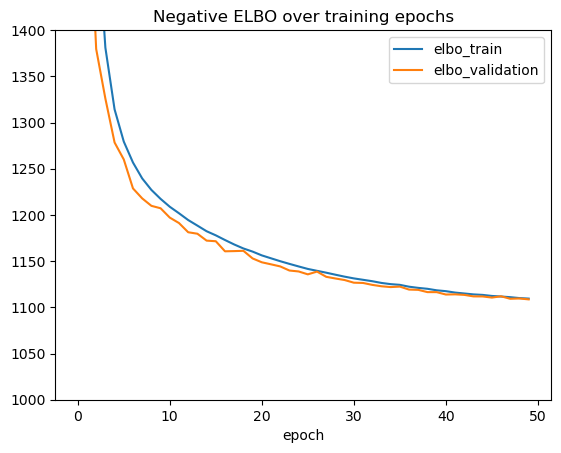

In [ ]:
fig, ax = plt.subplots(1, 1)
model.history["elbo_train"].plot(ax=ax, label="train")
model.history["elbo_validation"].plot(ax=ax, label="validation")
ax.set(title="Negative ELBO over training epochs", ylim=(1000, 1400))
ax.legend()

In [ ]:
rna = mdata.mod["rna_subset"]
protein = mdata.mod["protein"]

# arbitrarily store latent in rna modality
TOTALVI_LATENT_KEY = "X_totalVI"
rna.obsm[TOTALVI_LATENT_KEY] = model.get_latent_representation()

In [ ]:
all_batches = [*adata_citeseq_rna.obs['Run'].drop_duplicates().values]

rna_denoised, protein_denoised = model.get_normalized_expression(
    n_samples=10, return_mean=True, transform_batch=all_batches
)
rna.layers["denoised_rna"] = rna_denoised
protein.layers["denoised_protein"] = protein_denoised

protein.layers["protein_foreground_prob"] = 100 * model.get_protein_foreground_probability(
    n_samples=10, return_mean=True, transform_batch=all_batches
)


mdata.update()

/home/projects/amit/floriani/mambaforge/envs/cytovi_gpu/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/projects/amit/floriani/mambaforge/envs/cytovi_gpu/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [ ]:
TOTALVI_CLUSTERS_KEY = "leiden_totalVI"

sc.pp.neighbors(rna, use_rep=TOTALVI_LATENT_KEY)
sc.tl.umap(rna)
sc.tl.leiden(rna, key_added=TOTALVI_CLUSTERS_KEY)

mdata.update()

/tmp/ipykernel_1408928/1601322886.py:5: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(rna, key_added=TOTALVI_CLUSTERS_KEY)
/home/projects/amit/floriani/mambaforge/envs/cytovi_gpu/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/projects/amit/floriani/mambaforge/envs/cytovi_gpu/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual 

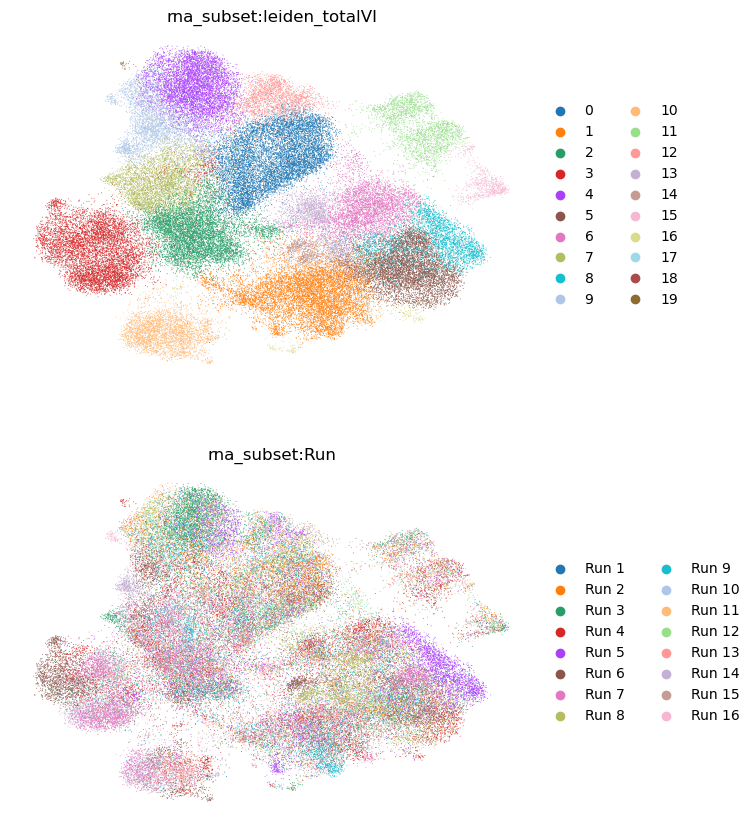

In [ ]:
import muon
muon.pl.embedding(
    mdata,
    basis="rna_subset:X_umap",
    color=[f"rna_subset:{TOTALVI_CLUSTERS_KEY}", "rna_subset:Run"],
    frameon=False,
    ncols=1,
)

In [ ]:
mdata

MuData object with n_obs × n_vars = 72721 × 40671
  obs:	'_scvi_labels'
  uns:	'_scvi_uuid', '_scvi_manager_uuid'
  3 modalities
    rna:	72721 x 36601
      obs:	'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'percent.mt', 'PatientID', 'Run', 'Entity', 'Age', 'Sex', 'Barcode_full', 'Phase', 'RNAclusters_res0.4', 'ADTclusters_res0.4', 'Stage', 'PTCategory', 'PTRegimen', 'PTCycles', 'PTDuration', 'DaysSincePT', 'PTIndication', 'PTResponse', 'FTCategory', 'FTRegimen', 'FTCycles', 'FTDuration', 'DaysUntilFT', 'FTIndication', 'FTResponse', 'Survival', 'DaysFollowup', 'Status', 'Karnofsky', 'Idents_res0.4', 'RNAclusters_res1', 'Idents_res1', 'Idents_res1_full', 'Maturation_M', 'predicted.Maturation.score', 'predicted.Maturation', 'MOFAclusters_res0.5', 'MOFAclusters_res1', 'MAPKscore', 'DZ.a.UPscore', 'DZ.a.DWNscore', 'DZ.b.UPscore', 'DZ.b.DWNscore', 'DZ.c.UPscore', 'DZ.c.DWNscore', 'INT.a.UPscore', 'INT.a.DWNscore', 'INT.b.UPscore', 'INT.b.DWNscore', 'INT.c.UPscore', 'INT.c.DWNscore', 'INT.d.UPscore', 'INT.d.DWNscore', 'INT.e.UPscore', 'INT.e.DWNscore', 'LZ.a.UPscore', 'LZ.a.DWNscore', 'LZ.b.UPscore', 'LZ.b.DWNscore', 'PreM.UPscore', 'PreM.DWNscore', 'PBL.a.UPscore', 'PBL.a.DWNscore', 'PBL.b.UPscore', 'PBL.b.DWNscore', 'predicted.Maturation.bulk', 'predicted.Maturation_course.score', 'predicted.Maturation_course', 'predicted.Maturation_fine.score', 'predicted.Maturation_fine', 'KLR', 'MOFAclusters_clean', 'Malignancy', 'State', 'nCount_scenic', 'nFeature_scenic', 'Relapse', 'DaysDiagnosed', 'CellType', 'Subtype', 'Barcode', 'S.Score', 'G2M.Score', 'seurat_clusters', 'CT_rnaCluster', 'integratedRNA_snn_res.0.4', 'integratedADT_snn_res.0.4', 'integratedRNA_snn_res.1', 'integratedADT_snn_res.0.8', 'integratedADT_snn_res.0.6', 'RNA.weight', 'ADT.weight', 'wsnn_res.0.7', 'wsnn_res.1', 'wsnn_res.1.4', 'IdentI_old', 'integratedADT_snn_res.1', 'integratedADT_snn_res.1.2', 'integratedADT_snn_res.1.4', 'integratedADT_snn_res.1.6', 'Ident_ADT', 'IdentI', 'orig.ident', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.3', 'RNA_snn_res.0.2', 'SampleID'
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_rank', 'variances', 'variances_norm', 'highly_variable_nbatches'
      uns:	'CellType_colors', 'Run_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'normalized'
      obsp:	'connectivities', 'distances'
    protein:	72721 x 70
      obs:	'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'percent.mt', 'PatientID', 'Run', 'Entity', 'Age', 'Sex', 'Barcode_full', 'Phase', 'RNAclusters_res0.4', 'ADTclusters_res0.4', 'Stage', 'PTCategory', 'PTRegimen', 'PTCycles', 'PTDuration', 'DaysSincePT', 'PTIndication', 'PTResponse', 'FTCategory', 'FTRegimen', 'FTCycles', 'FTDuration', 'DaysUntilFT', 'FTIndication', 'FTResponse', 'Survival', 'DaysFollowup', 'Status', 'Karnofsky', 'Idents_res0.4', 'RNAclusters_res1', 'Idents_res1', 'Idents_res1_full', 'Maturation_M', 'predicted.Maturation.score', 'predicted.Maturation', 'MOFAclusters_res0.5', 'MOFAclusters_res1', 'MAPKscore', 'DZ.a.UPscore', 'DZ.a.DWNscore', 'DZ.b.UPscore', 'DZ.b.DWNscore', 'DZ.c.UPscore', 'DZ.c.DWNscore', 'INT.a.UPscore', 'INT.a.DWNscore', 'INT.b.UPscore', 'INT.b.DWNscore', 'INT.c.UPscore', 'INT.c.DWNscore', 'INT.d.UPscore', 'INT.d.DWNscore', 'INT.e.UPscore', 'INT.e.DWNscore', 'LZ.a.UPscore', 'LZ.a.DWNscore', 'LZ.b.UPscore', 'LZ.b.DWNscore', 'PreM.UPscore', 'PreM.DWNscore', 'PBL.a.UPscore', 'PBL.a.DWNscore', 'PBL.b.UPscore', 'PBL.b.DWNscore', 'predicted.Maturation.bulk', 'predicted.Maturation_course.score', 'predicted.Maturation_course', 'predicted.Maturation_fine.score', 'predicted.Maturation_fine', 'KLR', 'MOFAclusters_clean', 'Malignancy', 'State', 'nCount_scenic', 'nFeature_scenic', 'Relapse', 'DaysDiagnosed', 'CellType', 'Subtype', 'Barcode', 'S.Score', 'G2M.Score', 'seurat_clusters', 'CT_rnaCluster', 'integratedRNA_snn_res.0.4', 'integratedADT_snn_res

In [ ]:
mdata.update()
muon.pl.embedding(
    mdata,
    basis="rna_subset:X_umap",
    color=['rna_subset:CD3E', 'rna_subset:CD8A', 'rna_subset:CD4'],
    frameon=False,
    ncols=1,
    layer="denoised_rna",
)

/home/projects/amit/floriani/mambaforge/envs/cytovi_gpu/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/projects/amit/floriani/mambaforge/envs/cytovi_gpu/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


KeyError: "Values ['rna_subset:CD3E', 'rna_subset:CD4'], from ['rna_subset:CD3E', 'CD8A', 'rna_subset:CD4'], are not valid obs/ var names or indices."

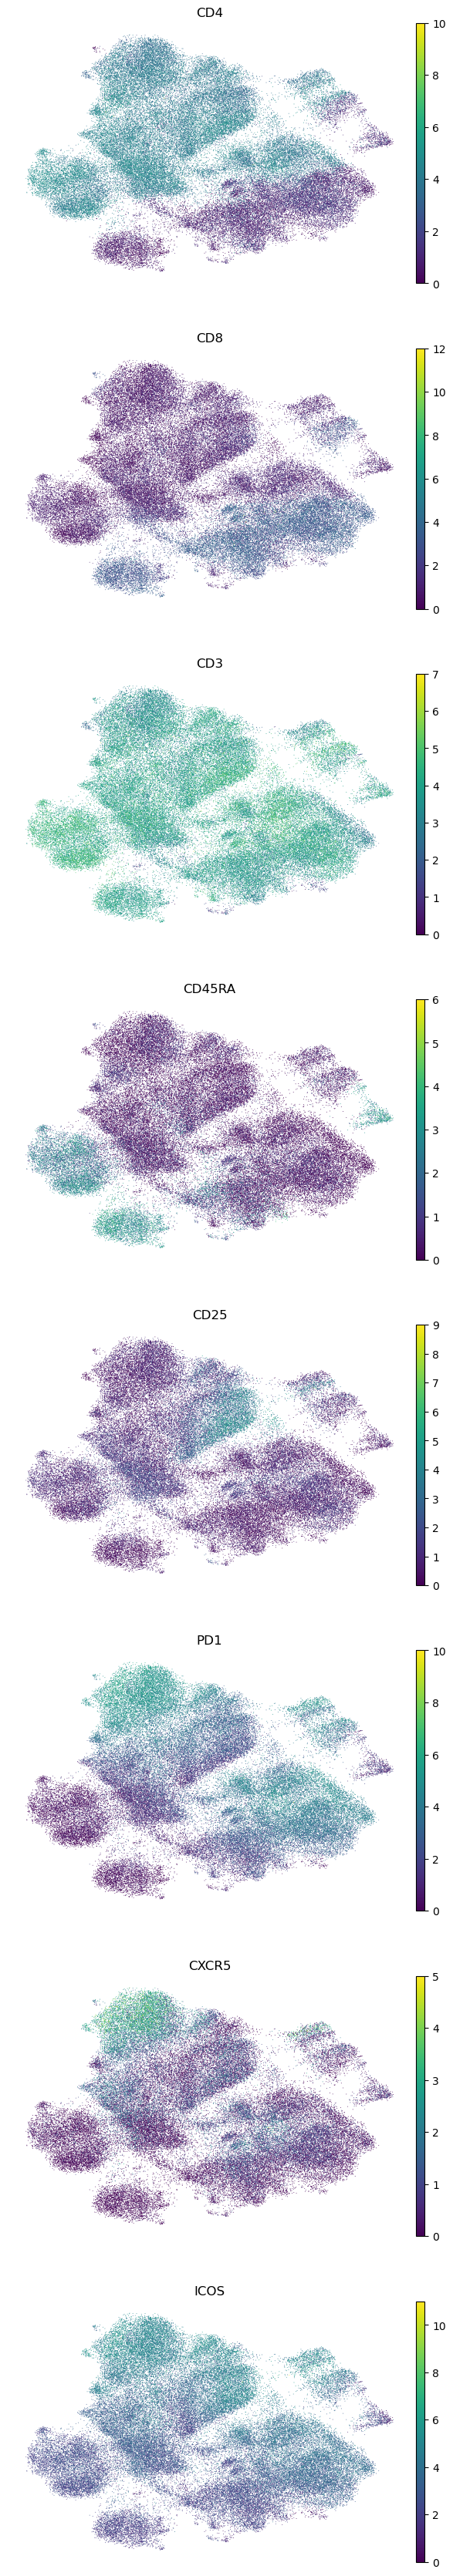

In [ ]:
muon.pl.embedding(
    mdata,
    basis="rna_subset:X_umap",
    color=['protein:CD4', 'protein:CD8', 'protein:CD3', 'protein:CD45RA', 'protein:CD25', 'protein:PD1', 'protein:CXCR5', 'protein:ICOS'],
    frameon=False,
    ncols=1,
    layer="transformed",
)

In [43]:
# save h5ad to disk
rna.write(f'{citeseq_data_dir}2025-01-17_BNHL_CITEseq_combined_RNA_TotalVI_imputed.h5ad')
protein.write(f'{citeseq_data_dir}2025-01-17_BNHL_CITEseq_Tcells_protein_cleaned_integrated_imputed_arcsinh_BB_TotalVI_imputed.h5ad')